## TPC-AI datasets
Scale factors & dimensions per scale factor

In [66]:
import pandas as pd
from figure_utils import *
df = read_data_chars(type_="tpc_ai", base_path=RUNTIME_DIR)
df['scale_factor'] = df.dataset.apply(lambda x: x.split("_")[-1].split("_")[-1]).astype(float)
df['usecase'] = df.dataset.apply(lambda x: int(x.split(":")[0].split("_")[1]))

df.head()

,data_characteristics,dataset,join,r_S,c_S,TR,FR,cardinality_T,cardinality_S,selectivity,nnz_T,nnz_S_sum,nnz_S,r_T,c_T,sparsity_T,sparsity_S,scale_factor,usecase
0,"{'r_S': [519999, 3265601, 189263], 'c_S': [3, ...",usecase_01:/mnt/data/output/scale_factor_0.01,preset,"[519999, 3265601, 189263]","[3, 3, 1]",0.150512,1.333333,3912340,3974863,1.015981,24408591,11546020,"[1559955, 9796803, 189262]",3912340,7,0.108732,"[2.6923128698341795e-05, 0.0, 5.28365290630716...",0.01,1
1,"{'r_S': [735391, 4616203, 268545], 'c_S': [3, ...",usecase_01:/mnt/data/output/scale_factor_0.02,preset,"[735391, 4616203, 268545]","[3, 3, 1]",0.150548,1.333333,5239233,5620139,1.072703,32448944,16323268,"[2206115, 13848609, 268544]",5239233,7,0.115221,"[2.6289869380136114e-05, 0.0, 3.72377069024487...",0.02,1
2,"{'r_S': [900666, 5651273, 328656], 'c_S': [3, ...",usecase_01:/mnt/data/output/scale_factor_0.03,preset,"[900666, 5651273, 328656]","[3, 3, 1]",0.150615,1.333333,6243872,6880595,1.101976,38514956,19984418,"[2701944, 16953819, 328655]",6243872,7,0.118794,"[1.9985210943929133e-05, 0.0, 3.04269509765475...",0.03,1
3,"{'r_S': [1039999, 6522857, 377376], 'c_S': [3,...",usecase_01:/mnt/data/output/scale_factor_0.04,preset,"[1039999, 6522857, 377376]","[3, 3, 1]",0.150719,1.333333,7097339,7940232,1.118762,43675999,23065902,"[3119956, 19568571, 377375]",7097339,7,0.120878,"[1.3141038276653912e-05, 0.0, 2.64987704567953...",0.04,1
4,"{'r_S': [1162755, 7292155, 421335], 'c_S': [3,...",usecase_01:/mnt/data/output/scale_factor_0.05,preset,"[1162755, 7292155, 421335]","[3, 3, 1]",0.150743,1.333333,7855933,8876245,1.129878,48264880,25786010,"[3488211, 21876465, 421334]",7855933,7,0.122322,"[1.548047525057327e-05, 0.0, 2.373408333089521...",0.05,1


In [81]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [45]:
# Pivot the dataframe to create new columns for each usecase
df_pivot = df.pivot(index='scale_factor', columns='usecase', values=['r_S', 'r_T'])

# Flatten the multi-level column names
# df_pivot.columns = ['_'.join(str(i) for i in col) for col in df_pivot.columns]

df_pivot
usecase1 = pd.DataFrame(df_pivot[('r_S', 1)].tolist(), index=df_pivot.index, columns=[('r_S', 1, 1), ('r_S', 1, 2), ('r_S', 1, 3)])
usecase10 = pd.DataFrame(df_pivot[('r_S', 10)].tolist(), index=df_pivot.index, columns=[('r_S', 10, 1), ('r_S', 10, 2)])
tab = pd.concat([df_pivot.drop(columns=[('r_S', 1), ('r_S', 10)]), usecase1, usecase10], axis=1)
tab.T.index
tab.columns = tab.columns.set_names(["Table", "Use Case"])
tab

Table              r_T               r_S                                  
Use Case            1        10       1         1        1     10       10
scale_factor                                                              
0.01           3912340  1112144   519999   3265601   189263  1000  1040000
0.02           5239233  1627573   735391   4616203   268545  1414  1470560
0.03           6243872  2010352   900666   5651273   328656  1732  1801280
0.04           7097339  2309067  1039999   6522857   377376  2000  2080000
0.05           7855933  2583247  1162755   7292155   421335  2236  2325440
0.06           8542036  2819530  1273734   7989492   463298  2449  2546960
0.07           9175067  3038617  1375790   8626275   500118  2646  2751840
0.08           9766199  3241867  1470782   9221030   534279  2828  2941120
0.09          10323646  3420452  1560000   9778636   567886  3000  3120000
0.10          10849415  3657068  1644384  10309804   597206  3162  3288480
0.15          13142631  4442656  2013951  12617669   730365  3873  4027920
0.20          15091716  5150120  2325510  14569097   843764  4472  4650880
0.25          16800377  5736764  2600000  16282854   944377  5000  5200000
0.30          18363420  6265062  2848157  17839713  1036844  5477  5696080
0.35          19781396  6769155  3076361  19269686  1117499  5916  6152640
0.40          21113693  7257258  3288768  20603304  1192417  6325  6578000
0.45          22363429  7634583  3488265  21853046  1265106  6708  6976320
0.50          23548828  8123214  3676955  23036913  1335985  7071  7353840

In [170]:
plotdf = pd.DataFrame(df.r_S.tolist())
plotdf['scale_factor'], plotdf['usecase'], plotdf['r_T'] = df.scale_factor, df.usecase, df.r_T
plotdfmelted_plotdf = plotdf.melt(id_vars=['scale_factor', 'usecase'], value_vars=[0, 1, 2, 'r_T'], var_name='Table', value_name='value')
plotdfmelted_plotdf.Table = plotdfmelted_plotdf.Table.apply(lambda x: "$T$" if x == 'r_T' else f"$S_{x}$")
plotdfmelted_plotdf

,scale_factor,usecase,Table,value
0,0.01,1,$S_0$,519999.0
1,0.02,1,$S_0$,735391.0
2,0.03,1,$S_0$,900666.0
3,0.04,1,$S_0$,1039999.0
4,0.05,1,$S_0$,1162755.0
...,...,...,...,...
139,0.30,10,$T$,6265062.0
140,0.35,10,$T$,6769155.0
141,0.40,10,$T$,7257258.0
142,0.45,10,$T$,7634583.0


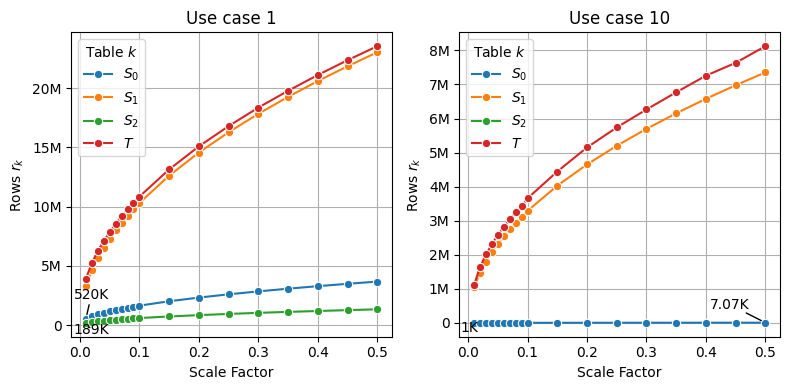

In [184]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from adjustText import adjust_text
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(FIGURE_WIDTH_INCHES, FIGURE_WIDTH_INCHES/2))

# Iterate through the grouped dataframe
for ax, (usecase, group) in zip(axs, plotdfmelted_plotdf.groupby('usecase')):
    ax = sns.lineplot(data=group, x='scale_factor', y='value', hue='Table', ax=ax, marker='o')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: human_format(x)))
    ax.set_title(f'Use case {usecase}')
    ax.legend(title="Table $k$")
    ax.grid(True)
    ax.set_ylabel("Rows $r_k$")
    ax.set_xlabel("Scale Factor")

    # Add annotations for the first, middle and last value for each line
    texts = []
    fontsize=10
    for line in ax.lines:
        x_values = line.get_xdata()
        y_values = line.get_ydata()
        if not any(x_values) or not any(y_values):
            break

        if y_values[0] < 1e6:
            texts.append(ax.text(x_values[0], y_values[0], human_format(y_values[0]), ha='center', va='bottom', fontsize=fontsize))
            
        if y_values[-1] < 1e6:
            texts.append(ax.text(x_values[-1], y_values[-1], human_format(y_values[-1]), ha='center', va='bottom', fontsize=fontsize))
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color='black', lw=1), force_static=(1.5, 1.5))
    
fig.tight_layout()
fig.savefig(f"{LATEX_PROJECT_BASE_PATH}/chapters/06_evaluation/figures/tpcx-ai-data-chars.pdf", bbox_inches="tight")